In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Define arrays 
t = []
S = []
E = []
I = [] 
R = []
dS = [] 
dE = [] 
dI = [] 
dR = []

In [3]:
# Define initial variables 
S0 = 8771761
E0 = 142
I0 = 37
R0 = 30

# Add initial variables to list
S.append(S0)
E.append(E0) 
I.append(I0) 
R.append(R0) 

In [4]:
# Parameter values 
h = 1
N = 1
sigma = 0.309 
beta = 0.00000002 
alpha = 0.4 
gamma = 0.1667 
delta = 0.14 
mu = 0.0012 
theta = 0.0187

In [5]:
# Define system of differential equations 
# dS/dt 
def dS(T, S, E, I, R):
    return (1 - sigma)*theta*N + delta*R - beta*S*E - mu*S 
# dE/dt
def dE(T, S, E, I, R):
    return beta*S*E - alpha*E - mu*E
# dI/dt 
def dI(T, S, E, I, R):
    return alpha*E - gamma*I - mu*I 
# dR/dt 
def dR(T, S, E, I, R):
    return gamma*I + sigma*theta*N - delta*R - mu*R


In [6]:
# Runge-Kutta method calculation
# k for dS/dt
# l for dE/dt 
# m for dI/dt
# n for dR/dt 
for i in range(0,100): 
    
    k1 = h*dS(i, S[i], E[i], I[i], R[i])
    l1 = h*dE(i, S[i], E[i], I[i], R[i])
    m1 = h*dI(i, S[i], E[i], I[i], R[i])
    n1 = h*dR(i, S[i], E[i], I[i], R[i])

    k2 = h*dS(i+0.5*h, S[i]+0.5*(h*k1), E[i]+0.5*(h*l1), I[i]+0.5*(h*m1), R[i]+0.5*(h*n1))
    l2 = h*dE(i+0.5*h, S[i]+0.5*(h*k1), E[i]+0.5*(h*l1), I[i]+0.5*(h*m1), R[i]+0.5*(h*n1))
    m2 = h*dI(i+0.5*h, S[i]+0.5*(h*k1), E[i]+0.5*(h*l1), I[i]+0.5*(h*m1), R[i]+0.5*(h*n1))
    n2 = h*dR(i+0.5*h, S[i]+0.5*(h*k1), E[i]+0.5*(h*l1), I[i]+0.5*(h*m1), R[i]+0.5*(h*n1))

    k3 = h*dS(i+0.5*h, S[i]+0.5*(h*k2), E[i]+0.5*(h*l2), I[i]+0.5*(h*m2), R[i]+0.5*(h*n2))
    l3 = h*dE(i+0.5*h, S[i]+0.5*(h*k2), E[i]+0.5*(h*l2), I[i]+0.5*(h*m2), R[i]+0.5*(h*n2))
    m3 = h*dI(i+0.5*h, S[i]+0.5*(h*k2), E[i]+0.5*(h*l2), I[i]+0.5*(h*m2), R[i]+0.5*(h*n2))
    n3 = h*dR(i+0.5*h, S[i]+0.5*(h*k2), E[i]+0.5*(h*l2), I[i]+0.5*(h*m2), R[i]+0.5*(h*n2))

    k4 = h*dS(i+h, S[i]+h*k3, E[i]+h*l3, I[i]+h*m3, R[i]+h*n3)
    l4 = h*dE(i+h, S[i]+h*k3, E[i]+h*l3, I[i]+h*m3, R[i]+h*n3)
    m4 = h*dI(i+h, S[i]+h*k3, E[i]+h*l3, I[i]+h*m3, R[i]+h*n3)
    n4 = h*dR(i+h, S[i]+h*k3, E[i]+h*l3, I[i]+h*m3, R[i]+h*n3)

    S.append(S[i] + (1/6)*h*(k1 + 2*k2 + 2*k3 + k4))
    E.append(E[i] + (1/6)*h*(l1 + 2*l2 + 2*l3 + l4))
    I.append(I[i] + (1/6)*h*(m1 + 2*m2 + 2*m3 + m4))
    R.append(R[i] + (1/6)*h*(n1 + 2*n2 + 2*n3 + n4))

In [7]:
t = list(range(0,101))
d = {'t':t, 'S(t)':S, 'E(t)':E, 'I(t)':I, 'R(t)':R}
df = pd.DataFrame(data=d)
df

,t,S(t),E(t),I(t),R(t)
0,0,8.771761e+06,1.420000e+02,37.000000,30.000000
1,1,8.761223e+06,1.132913e+02,77.934045,35.305665
2,2,8.750704e+06,9.036780e+01,103.105451,44.957170
3,3,8.740203e+06,7.206749e+01,116.852721,56.292541
4,4,8.729718e+06,5.746110e+01,122.461598,67.587533
...,...,...,...,...,...
96,96,7.817475e+06,2.160206e-08,0.000097,0.045953
97,97,7.808100e+06,1.690913e-08,0.000082,0.045304
98,98,7.798736e+06,1.323323e-08,0.000069,0.044739
99,99,7.789383e+06,1.035450e-08,0.000058,0.044246


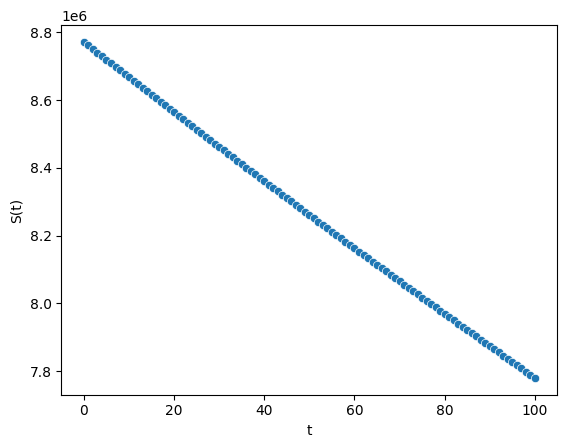

In [8]:
S_plot = sns.scatterplot(x='t', y='S(t)', data=df)

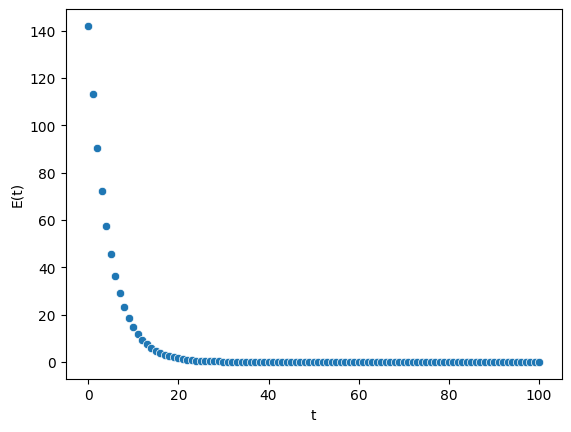

In [9]:
E_plot = sns.scatterplot(x='t', y='E(t)', data=df)

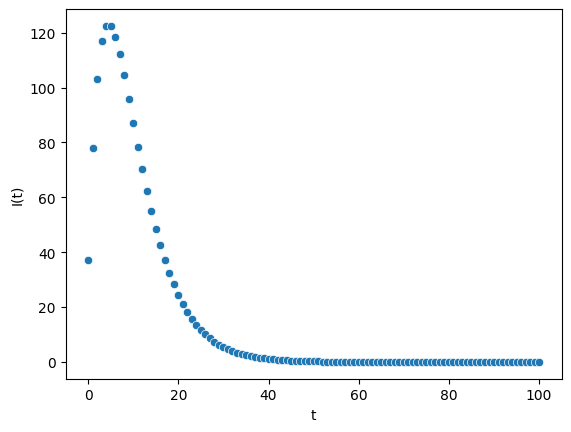

In [10]:
I_plot = sns.scatterplot(x='t', y='I(t)', data=df)

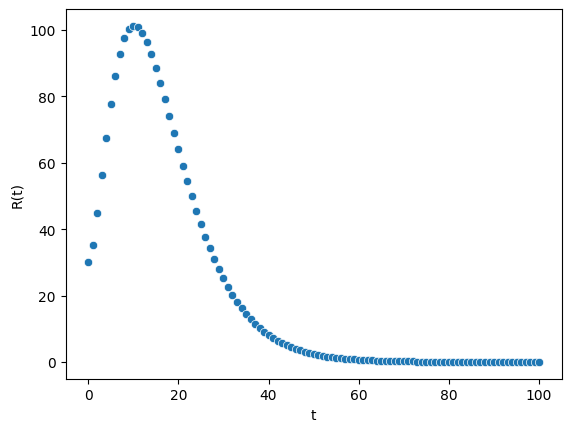

In [11]:
R_plot = sns.scatterplot(x='t', y='R(t)', data=df, )

In [12]:
# Export data to csv file
df.to_csv('data.csv')